In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [2]:
df=pd.read_csv('Iris.csv')
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
25,26,5.0,3.0,1.6,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
30,31,4.8,3.1,1.6,0.2,Iris-setosa


In [3]:
# Check dimension of data
df.shape

(150, 6)

In [4]:
#Check data Type
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
# No Null values found
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
#Check the dataset
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [30]:
from sklearn import preprocessing

In [32]:
enc=preprocessing.LabelEncoder()
y_enc=enc.fit_transform(y)

### Find the distribution of target variable (Class) (1 Marks)

In [34]:
import scipy.stats as stats
binomial=stats.binom.pmf(y_enc,150,0.5)
binomial

array([7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 7.00649232e-46, 7.00649232e-46,
       7.00649232e-46, 7.00649232e-46, 1.05097385e-43, 1.05097385e-43,
       1.05097385e-43, 1.05097385e-43, 1.05097385e-43, 1.05097385e-43,
      

### Plot the distribution of target variable using histogram

(array([50.,  0.,  0., 50.,  0., 50.]),
 array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        ]),
 <a list of 6 Patch objects>)

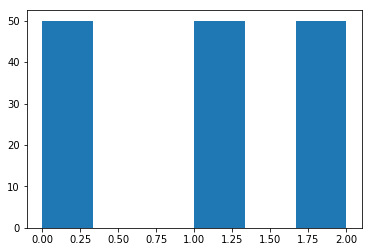

In [38]:
plt.hist(y_enc,bins=6)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D732D4080>,
      dtype=object)

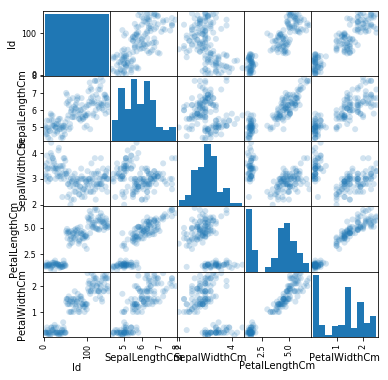

In [43]:
pd.scatter_matrix(df,alpha=0.2,figsize=(6,6))

In [ ]:
#peta length is linearly related to sepal length and petal width

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 <a list of 20 Patch objects>)

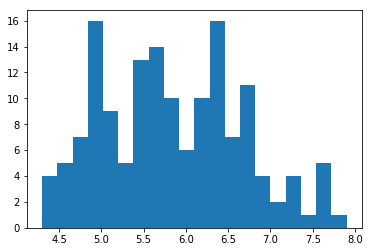

In [55]:
plt.hist(df['SepalLengthCm'],bins=20)

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

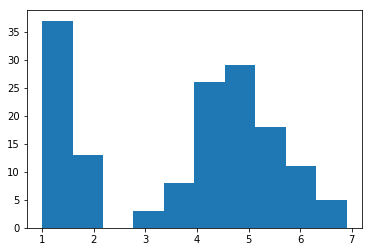

In [57]:
plt.hist(df['PetalLengthCm'],bins=10)

In [60]:
#Drop Id variable from data
x=x.drop('Id',axis=1)

### Correlation among all variables and give your insights (1 Marks)

In [61]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
x.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [62]:
#dropping petal length as it is having high correlation with sepallength and petalwidth
x=x.drop('PetalLengthCm',axis=1)

### Split data in Training and Validation in 80:20 (1 Marks)

In [72]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_enc,test_size=0.2,random_state=0)

### Do Feature Scaling ( 1 Marks)

In [70]:
# Use StandardScaler or similar methods
scaler=preprocessing.MinMaxScaler()
scaler.fit(x_train)
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

### Train and Fit NaiveBayes Model(2 Marks)

In [71]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

In [73]:
model=GaussianNB()
model.fit(x_train_scaler,y_train)

GaussianNB(priors=None)

In [75]:
#Predict
y_pred=model.predict(x_test_scaler)

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [78]:
# show Confusion Matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 11  2]
 [ 0  1  5]]


In [79]:
# show accuracy
print(metrics.accuracy_score(y_test,y_pred))

0.9


In [80]:
#Show precision and Recall metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.92      0.85      0.88        13
          2       0.71      0.83      0.77         6

avg / total       0.91      0.90      0.90        30

